In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:\GEN1_AI\Dataset\Machine_Learning\medical-charges.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as mlt
import seaborn as sb 

In [10]:
sb.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [11]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
fig = px.histogram(df,
                   x='age', 
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(width=800, height=600, bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI')
fig.update_layout (width=800, height=600, bargap=0.1)
fig.show()

In [14]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout (width=800, height=600, bargap=0.1)
fig.show()

In [15]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
fig = px.histogram(df, x='smoker', 
            color='sex',
            color_discrete_sequence=['skyblue', 'darkcyan'],
            title='Smoker')
fig.update_layout(width=800, height=600, bargap=0.02)
fig.show()


In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
fig = px.histogram(df, x='region', 
            color='sex',
            color_discrete_sequence=['salmon', 'dimgrey'],
            title='Smoker')
fig.update_layout(width=800, height=600, bargap=0.02)
fig.show()


In [19]:
fig = px.scatter(df, 
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age v/s Charges')
fig.update_traces(marker_size=5)
fig.update_layout(width=800, height=600, bargap=0.02)
fig.show()

In [20]:
fig = px.scatter(df, 
                x='bmi',
                y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI v/s Charges')
fig.update_traces(marker_size=5)
fig.update_layout(width=800, height=600, bargap=0.02)
fig.show()

In [21]:
px.violin(df, x='children', y='charges').update_layout(width=800, height=600, bargap=0.02)

In [22]:
df.charges.corr(df.age)

np.float64(0.2990081933306478)

In [23]:
df.charges.corr(df.bmi)

np.float64(0.19834096883362887)

In [24]:
df.charges.corr(df.children)


np.float64(0.06799822684790487)

In [25]:
df['smoker'] = df['smoker'].map({"yes":1, "no":0})

In [26]:
df.smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [27]:
df.charges.corr(df.smoker)

np.float64(0.7872514304984778)

In [28]:

df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

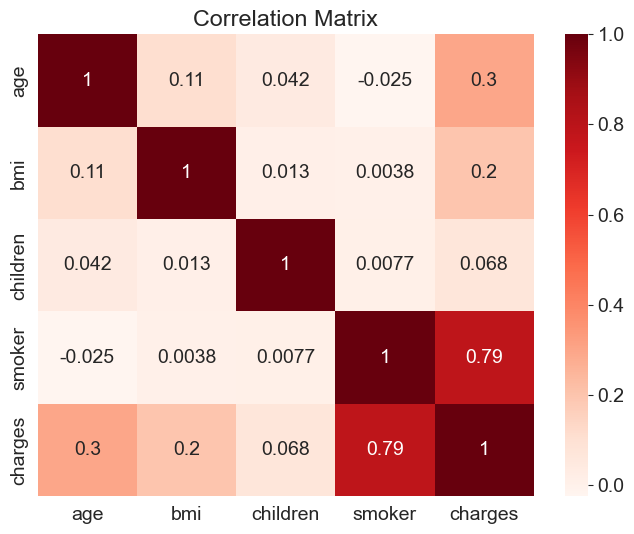

In [37]:
mlt.figure(figsize=(8, 6))
ax = sb.heatmap(df_numeric.corr(), cmap='Reds', annot=True)
mlt.title('Correlation Matrix')

In [30]:
non_smoker_df = df[df.smoker == 0]

In [31]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,0,southwest,11411.68500
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350


[Text(0.5, 1.0, 'Age v/s Charges')]

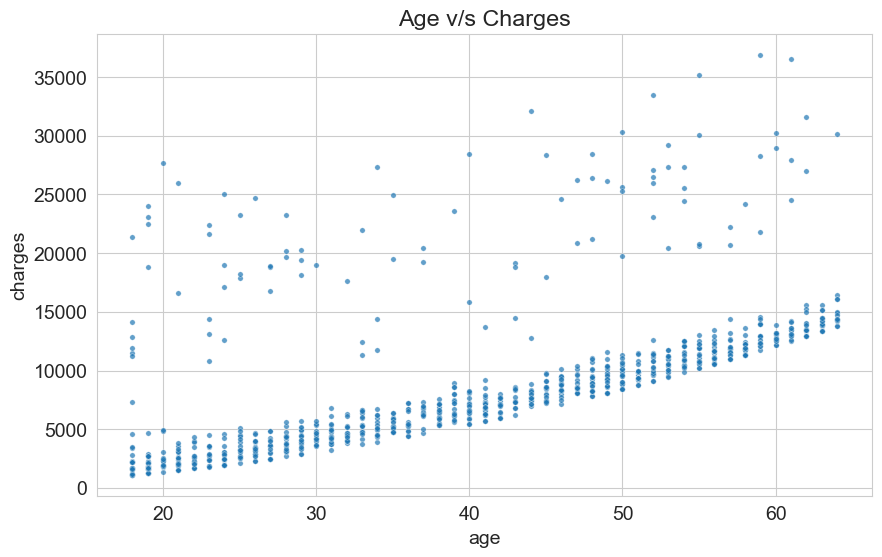

In [35]:

sb.scatterplot(data = non_smoker_df, x='age', y='charges', alpha=0.7, s=15).set(title ='Age v/s Charges')